#### Imports

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.models as models
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

import train
import util

'''Set parameters'''
torch.manual_seed(1) # set the random seed
use_cuda = True # Use cuda
batch_size = 128
num_workers = 0

'''Check GPU'''
print(torch.cuda.get_device_name(torch.cuda.current_device()))

GeForce RTX 2060


#### Visualize some data from the training set
- Also check if they have been normalized

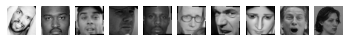

In [2]:
#load tensors
master_path = '../ProcessedData/combined/'
dataset = torchvision.datasets.DatasetFolder(master_path + 'train', loader=torch.load, extensions=('.tensor'))
# Prepare Dataloader
train_loader = torch.utils.data.DataLoader(dataset, batch_size=1, num_workers=num_workers, shuffle=True)

# Verification Step - obtain one batch of imgs
dataiter = iter(train_loader)

# Visualize 5 images
fig = plt.figure()
for i in range(10):
    imgs, labels = dataiter.next()
    for img in imgs:
        img_np = np.asarray((img.transpose(0,1)).transpose(1,2))
        plt.subplot(1, 10, i+1)    
        plt.imshow(img_np)
        plt.axis('off')

#### Load data

In [3]:
#load tensors
master_path = '../ProcessedData/combined/'

train_dataset = torchvision.datasets.DatasetFolder(master_path + 'train', loader=torch.load, extensions=('.tensor'))
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, num_workers=num_workers, shuffle=True)

val_dataset = torchvision.datasets.DatasetFolder(master_path + 'validate', loader=torch.load, extensions=('.tensor'))
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, num_workers=num_workers, shuffle=True)

test_dataset = torchvision.datasets.DatasetFolder(master_path + 'test', loader=torch.load, extensions=('.tensor'))
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, num_workers=num_workers, shuffle=True)

In [4]:
print(train_dataset)
print(val_dataset)
print(test_dataset)

Dataset DatasetFolder
    Number of datapoints: 72000
    Root location: ../ProcessedData/combined/train
Dataset DatasetFolder
    Number of datapoints: 7699
    Root location: ../ProcessedData/combined/validate
Dataset DatasetFolder
    Number of datapoints: 7707
    Root location: ../ProcessedData/combined/test


#### Train our NN

Iteration:  1 Train acc:   0.13  Train loss:  0.01407151  Time Elapsed:   1.27 s 
Iteration:  2 Train acc:   0.16  Train loss:  0.01412064  Time Elapsed:   1.45 s 
Iteration:  3 Train acc:   0.21  Train loss:  0.01399204  Time Elapsed:   1.58 s 
Iteration:  4 Train acc:   0.17  Train loss:  0.01407402  Time Elapsed:   1.72 s 
Iteration:  5 Train acc:   0.17  Train loss:  0.01397165  Time Elapsed:   1.87 s 
Iteration:  6 Train acc:   0.12  Train loss:  0.01407134  Time Elapsed:   2.04 s 
Iteration:  7 Train acc:   0.17  Train loss:  0.01399874  Time Elapsed:   2.19 s 
Iteration:  8 Train acc:   0.20  Train loss:  0.01396630  Time Elapsed:   2.34 s 
Iteration:  9 Train acc:   0.25  Train loss:  0.01378225  Time Elapsed:   2.49 s 
Iteration:  10 Train acc:   0.20  Train loss:  0.01404795  Time Elapsed:   2.65 s 
Iteration:  11 Train acc:   0.27  Train loss:  0.01386876  Time Elapsed:   2.79 s 
Iteration:  12 Train acc:   0.15  Train loss:  0.01409958  Time Elapsed:   2.93 s 
Iteration:  1

Iteration:  101 Train acc:   0.20  Train loss:  0.01391066  Time Elapsed:  15.88 s 
Iteration:  102 Train acc:   0.14  Train loss:  0.01407056  Time Elapsed:  16.02 s 
Iteration:  103 Train acc:   0.21  Train loss:  0.01384183  Time Elapsed:  16.18 s 
Iteration:  104 Train acc:   0.18  Train loss:  0.01391971  Time Elapsed:  16.32 s 
Iteration:  105 Train acc:   0.23  Train loss:  0.01379754  Time Elapsed:  16.46 s 
Iteration:  106 Train acc:   0.26  Train loss:  0.01374904  Time Elapsed:  16.59 s 
Iteration:  107 Train acc:   0.19  Train loss:  0.01389986  Time Elapsed:  16.74 s 
Iteration:  108 Train acc:   0.20  Train loss:  0.01398674  Time Elapsed:  16.88 s 
Iteration:  109 Train acc:   0.15  Train loss:  0.01397596  Time Elapsed:  17.02 s 
Iteration:  110 Train acc:   0.28  Train loss:  0.01366936  Time Elapsed:  17.17 s 
Iteration:  111 Train acc:   0.25  Train loss:  0.01389273  Time Elapsed:  17.32 s 
Iteration:  112 Train acc:   0.16  Train loss:  0.01376583  Time Elapsed:  1

Iteration:  199 Train acc:   0.26  Train loss:  0.01342117  Time Elapsed:  30.22 s 
Iteration:  200 Train acc:   0.19  Train loss:  0.01368313  Time Elapsed:  30.37 s 
Iteration:  201 Train acc:   0.33  Train loss:  0.01320443  Time Elapsed:  30.52 s 
Iteration:  202 Train acc:   0.19  Train loss:  0.01372572  Time Elapsed:  30.68 s 
Iteration:  203 Train acc:   0.29  Train loss:  0.01320626  Time Elapsed:  30.83 s 
Iteration:  204 Train acc:   0.18  Train loss:  0.01371298  Time Elapsed:  30.99 s 
Iteration:  205 Train acc:   0.20  Train loss:  0.01358033  Time Elapsed:  31.14 s 
Iteration:  206 Train acc:   0.23  Train loss:  0.01353687  Time Elapsed:  31.30 s 
Iteration:  207 Train acc:   0.25  Train loss:  0.01348047  Time Elapsed:  31.45 s 
Iteration:  208 Train acc:   0.33  Train loss:  0.01352619  Time Elapsed:  31.60 s 
Iteration:  209 Train acc:   0.23  Train loss:  0.01347367  Time Elapsed:  31.73 s 
Iteration:  210 Train acc:   0.26  Train loss:  0.01337320  Time Elapsed:  3

Iteration:  297 Train acc:   0.34  Train loss:  0.01260691  Time Elapsed:  44.90 s 
Iteration:  298 Train acc:   0.30  Train loss:  0.01315330  Time Elapsed:  45.06 s 
Iteration:  299 Train acc:   0.30  Train loss:  0.01287832  Time Elapsed:  45.20 s 
Iteration:  300 Train acc:   0.37  Train loss:  0.01258358  Time Elapsed:  45.35 s 
Iteration:  301 Train acc:   0.35  Train loss:  0.01300816  Time Elapsed:  45.50 s 
Iteration:  302 Train acc:   0.29  Train loss:  0.01296446  Time Elapsed:  45.66 s 
Iteration:  303 Train acc:   0.30  Train loss:  0.01329264  Time Elapsed:  45.81 s 
Iteration:  304 Train acc:   0.32  Train loss:  0.01321675  Time Elapsed:  45.95 s 
Iteration:  305 Train acc:   0.40  Train loss:  0.01249000  Time Elapsed:  46.09 s 
Iteration:  306 Train acc:   0.38  Train loss:  0.01296575  Time Elapsed:  46.23 s 
Iteration:  307 Train acc:   0.34  Train loss:  0.01281741  Time Elapsed:  46.37 s 
Iteration:  308 Train acc:   0.31  Train loss:  0.01304062  Time Elapsed:  4

Iteration:  395 Train acc:   0.35  Train loss:  0.01213543  Time Elapsed:  59.74 s 
Iteration:  396 Train acc:   0.40  Train loss:  0.01208296  Time Elapsed:  59.89 s 
Iteration:  397 Train acc:   0.34  Train loss:  0.01214019  Time Elapsed:  60.05 s 
Iteration:  398 Train acc:   0.39  Train loss:  0.01163934  Time Elapsed:  60.19 s 
Iteration:  399 Train acc:   0.42  Train loss:  0.01180084  Time Elapsed:  60.36 s 
Iteration:  400 Train acc:   0.36  Train loss:  0.01219044  Time Elapsed:  60.53 s 
Iteration:  401 Train acc:   0.30  Train loss:  0.01239991  Time Elapsed:  60.68 s 
Iteration:  402 Train acc:   0.39  Train loss:  0.01215002  Time Elapsed:  60.84 s 
Iteration:  403 Train acc:   0.35  Train loss:  0.01197863  Time Elapsed:  60.99 s 
Iteration:  404 Train acc:   0.38  Train loss:  0.01194486  Time Elapsed:  61.15 s 
Iteration:  405 Train acc:   0.27  Train loss:  0.01238103  Time Elapsed:  61.30 s 
Iteration:  406 Train acc:   0.34  Train loss:  0.01209975  Time Elapsed:  6

Iteration:  493 Train acc:   0.46  Train loss:  0.01059395  Time Elapsed:  75.28 s 
Iteration:  494 Train acc:   0.34  Train loss:  0.01159235  Time Elapsed:  75.43 s 
Iteration:  495 Train acc:   0.41  Train loss:  0.01112849  Time Elapsed:  75.58 s 
Iteration:  496 Train acc:   0.42  Train loss:  0.01051668  Time Elapsed:  75.74 s 
Iteration:  497 Train acc:   0.37  Train loss:  0.01111287  Time Elapsed:  75.89 s 
Iteration:  498 Train acc:   0.38  Train loss:  0.01139276  Time Elapsed:  76.06 s 
Iteration:  499 Train acc:   0.40  Train loss:  0.01108474  Time Elapsed:  76.21 s 
Iteration:  500 Train acc:   0.38  Train loss:  0.01177078  Time Elapsed:  76.37 s 
Iteration:  501 Train acc:   0.39  Train loss:  0.01103539  Time Elapsed:  76.53 s 
Iteration:  502 Train acc:   0.46  Train loss:  0.01020340  Time Elapsed:  76.70 s 
Iteration:  503 Train acc:   0.44  Train loss:  0.01117780  Time Elapsed:  76.86 s 
Iteration:  504 Train acc:   0.44  Train loss:  0.01116309  Time Elapsed:  7

Iteration:  591 Train acc:   0.47  Train loss:  0.00995461  Time Elapsed:  126.29 s 
Iteration:  592 Train acc:   0.48  Train loss:  0.01052340  Time Elapsed:  126.41 s 
Iteration:  593 Train acc:   0.41  Train loss:  0.01091569  Time Elapsed:  126.53 s 
Iteration:  594 Train acc:   0.52  Train loss:  0.00998313  Time Elapsed:  126.65 s 
Iteration:  595 Train acc:   0.47  Train loss:  0.00996081  Time Elapsed:  126.77 s 
Iteration:  596 Train acc:   0.43  Train loss:  0.01067285  Time Elapsed:  126.90 s 
Iteration:  597 Train acc:   0.52  Train loss:  0.00985019  Time Elapsed:  127.02 s 
Iteration:  598 Train acc:   0.54  Train loss:  0.01026294  Time Elapsed:  127.14 s 
Iteration:  599 Train acc:   0.50  Train loss:  0.01038686  Time Elapsed:  127.26 s 
Iteration:  600 Train acc:   0.46  Train loss:  0.01023003  Time Elapsed:  127.39 s 
Iteration:  601 Train acc:   0.44  Train loss:  0.01091164  Time Elapsed:  127.51 s 
Iteration:  602 Train acc:   0.51  Train loss:  0.01035213  Time 

Iteration:  689 Train acc:   0.55  Train loss:  0.00947049  Time Elapsed:  138.29 s 
Iteration:  690 Train acc:   0.46  Train loss:  0.01081332  Time Elapsed:  138.41 s 
Iteration:  691 Train acc:   0.42  Train loss:  0.01114992  Time Elapsed:  138.53 s 
Iteration:  692 Train acc:   0.45  Train loss:  0.01074548  Time Elapsed:  138.65 s 
Iteration:  693 Train acc:   0.48  Train loss:  0.01014141  Time Elapsed:  138.78 s 
Iteration:  694 Train acc:   0.43  Train loss:  0.01019649  Time Elapsed:  138.90 s 
Iteration:  695 Train acc:   0.44  Train loss:  0.01036978  Time Elapsed:  139.02 s 
Iteration:  696 Train acc:   0.43  Train loss:  0.00976591  Time Elapsed:  139.15 s 
Iteration:  697 Train acc:   0.46  Train loss:  0.01034854  Time Elapsed:  139.27 s 
Iteration:  698 Train acc:   0.41  Train loss:  0.01070133  Time Elapsed:  139.39 s 
Iteration:  699 Train acc:   0.51  Train loss:  0.01033349  Time Elapsed:  139.51 s 
Iteration:  700 Train acc:   0.41  Train loss:  0.01118540  Time 

Iteration:  787 Train acc:   0.43  Train loss:  0.01071952  Time Elapsed:  150.29 s 
Iteration:  788 Train acc:   0.46  Train loss:  0.00974365  Time Elapsed:  150.41 s 
Iteration:  789 Train acc:   0.48  Train loss:  0.00961705  Time Elapsed:  150.54 s 
Iteration:  790 Train acc:   0.49  Train loss:  0.00991355  Time Elapsed:  150.66 s 
Iteration:  791 Train acc:   0.47  Train loss:  0.00990085  Time Elapsed:  150.78 s 
Iteration:  792 Train acc:   0.54  Train loss:  0.00936721  Time Elapsed:  150.90 s 
Iteration:  793 Train acc:   0.49  Train loss:  0.00945639  Time Elapsed:  151.03 s 
Iteration:  794 Train acc:   0.44  Train loss:  0.01035153  Time Elapsed:  151.15 s 
Iteration:  795 Train acc:   0.52  Train loss:  0.00996718  Time Elapsed:  151.27 s 
Iteration:  796 Train acc:   0.52  Train loss:  0.01004225  Time Elapsed:  151.39 s 
Iteration:  797 Train acc:   0.46  Train loss:  0.00982012  Time Elapsed:  151.52 s 
Iteration:  798 Train acc:   0.38  Train loss:  0.01071614  Time 

Iteration:  885 Train acc:   0.55  Train loss:  0.00958544  Time Elapsed:  162.32 s 
Iteration:  886 Train acc:   0.52  Train loss:  0.00982718  Time Elapsed:  162.44 s 
Iteration:  887 Train acc:   0.52  Train loss:  0.00966630  Time Elapsed:  162.56 s 
Iteration:  888 Train acc:   0.55  Train loss:  0.01004427  Time Elapsed:  162.69 s 
Iteration:  889 Train acc:   0.52  Train loss:  0.00960247  Time Elapsed:  162.81 s 
Iteration:  890 Train acc:   0.53  Train loss:  0.00958463  Time Elapsed:  162.93 s 
Iteration:  891 Train acc:   0.48  Train loss:  0.00956360  Time Elapsed:  163.05 s 
Iteration:  892 Train acc:   0.49  Train loss:  0.01051472  Time Elapsed:  163.18 s 
Iteration:  893 Train acc:   0.46  Train loss:  0.01013210  Time Elapsed:  163.30 s 
Iteration:  894 Train acc:   0.46  Train loss:  0.01027964  Time Elapsed:  163.42 s 
Iteration:  895 Train acc:   0.62  Train loss:  0.00894161  Time Elapsed:  163.54 s 
Iteration:  896 Train acc:   0.52  Train loss:  0.00944390  Time 

Iteration:  983 Train acc:   0.57  Train loss:  0.00885804  Time Elapsed:  174.33 s 
Iteration:  984 Train acc:   0.62  Train loss:  0.00791698  Time Elapsed:  174.45 s 
Iteration:  985 Train acc:   0.52  Train loss:  0.00955607  Time Elapsed:  174.58 s 
Iteration:  986 Train acc:   0.55  Train loss:  0.00944514  Time Elapsed:  174.70 s 
Iteration:  987 Train acc:   0.51  Train loss:  0.00896584  Time Elapsed:  174.82 s 
Iteration:  988 Train acc:   0.52  Train loss:  0.00936641  Time Elapsed:  174.94 s 
Iteration:  989 Train acc:   0.55  Train loss:  0.00894060  Time Elapsed:  175.07 s 
Iteration:  990 Train acc:   0.61  Train loss:  0.00853969  Time Elapsed:  175.19 s 
Iteration:  991 Train acc:   0.53  Train loss:  0.00949757  Time Elapsed:  175.31 s 
Iteration:  992 Train acc:   0.55  Train loss:  0.00869336  Time Elapsed:  175.43 s 
Iteration:  993 Train acc:   0.56  Train loss:  0.00926589  Time Elapsed:  175.56 s 
Iteration:  994 Train acc:   0.55  Train loss:  0.00934836  Time 

Iteration:  1079 Train acc:   0.62  Train loss:  0.00822414  Time Elapsed:  186.09 s 
Iteration:  1080 Train acc:   0.53  Train loss:  0.00911841  Time Elapsed:  186.22 s 
Iteration:  1081 Train acc:   0.59  Train loss:  0.00925225  Time Elapsed:  186.34 s 
Iteration:  1082 Train acc:   0.52  Train loss:  0.00946673  Time Elapsed:  186.46 s 
Iteration:  1083 Train acc:   0.55  Train loss:  0.00905598  Time Elapsed:  186.58 s 
Iteration:  1084 Train acc:   0.55  Train loss:  0.00825897  Time Elapsed:  186.71 s 
Iteration:  1085 Train acc:   0.55  Train loss:  0.00933408  Time Elapsed:  186.83 s 
Iteration:  1086 Train acc:   0.59  Train loss:  0.00834740  Time Elapsed:  186.95 s 
Iteration:  1087 Train acc:   0.52  Train loss:  0.00932583  Time Elapsed:  187.07 s 
Iteration:  1088 Train acc:   0.55  Train loss:  0.00947378  Time Elapsed:  187.20 s 
Iteration:  1089 Train acc:   0.56  Train loss:  0.00810681  Time Elapsed:  187.32 s 
Iteration:  1090 Train acc:   0.57  Train loss:  0.009

Iteration:  1174 Train acc:   0.65  Train loss:  0.00806985  Time Elapsed:  203.38 s 
Iteration:  1175 Train acc:   0.62  Train loss:  0.00835250  Time Elapsed:  203.50 s 
Iteration:  1176 Train acc:   0.57  Train loss:  0.00830614  Time Elapsed:  203.63 s 
Iteration:  1177 Train acc:   0.66  Train loss:  0.00771090  Time Elapsed:  203.75 s 
Iteration:  1178 Train acc:   0.70  Train loss:  0.00690562  Time Elapsed:  203.87 s 
Iteration:  1179 Train acc:   0.58  Train loss:  0.00778416  Time Elapsed:  203.99 s 
Iteration:  1180 Train acc:   0.59  Train loss:  0.00788537  Time Elapsed:  204.12 s 
Iteration:  1181 Train acc:   0.61  Train loss:  0.00792624  Time Elapsed:  204.24 s 
Iteration:  1182 Train acc:   0.70  Train loss:  0.00713015  Time Elapsed:  204.36 s 
Iteration:  1183 Train acc:   0.60  Train loss:  0.00786444  Time Elapsed:  204.49 s 
Iteration:  1184 Train acc:   0.58  Train loss:  0.00826080  Time Elapsed:  204.61 s 
Iteration:  1185 Train acc:   0.55  Train loss:  0.008

Iteration:  1270 Train acc:   0.54  Train loss:  0.00883960  Time Elapsed:  215.16 s 
Iteration:  1271 Train acc:   0.66  Train loss:  0.00781015  Time Elapsed:  215.28 s 
Iteration:  1272 Train acc:   0.62  Train loss:  0.00797067  Time Elapsed:  215.40 s 
Iteration:  1273 Train acc:   0.61  Train loss:  0.00763100  Time Elapsed:  215.53 s 
Iteration:  1274 Train acc:   0.55  Train loss:  0.00885503  Time Elapsed:  215.65 s 
Iteration:  1275 Train acc:   0.55  Train loss:  0.00793753  Time Elapsed:  215.77 s 
Iteration:  1276 Train acc:   0.70  Train loss:  0.00673058  Time Elapsed:  215.89 s 
Iteration:  1277 Train acc:   0.50  Train loss:  0.00958201  Time Elapsed:  216.02 s 
Iteration:  1278 Train acc:   0.68  Train loss:  0.00712318  Time Elapsed:  216.14 s 
Iteration:  1279 Train acc:   0.54  Train loss:  0.00921456  Time Elapsed:  216.26 s 
Iteration:  1280 Train acc:   0.60  Train loss:  0.00812648  Time Elapsed:  216.38 s 
Iteration:  1281 Train acc:   0.60  Train loss:  0.007

Iteration:  1366 Train acc:   0.63  Train loss:  0.00804480  Time Elapsed:  226.95 s 
Iteration:  1367 Train acc:   0.63  Train loss:  0.00714991  Time Elapsed:  227.07 s 
Iteration:  1368 Train acc:   0.59  Train loss:  0.00866616  Time Elapsed:  227.19 s 
Iteration:  1369 Train acc:   0.62  Train loss:  0.00767173  Time Elapsed:  227.32 s 
Iteration:  1370 Train acc:   0.58  Train loss:  0.00838517  Time Elapsed:  227.44 s 
Iteration:  1371 Train acc:   0.63  Train loss:  0.00701900  Time Elapsed:  227.57 s 
Iteration:  1372 Train acc:   0.61  Train loss:  0.00797665  Time Elapsed:  227.69 s 
Iteration:  1373 Train acc:   0.66  Train loss:  0.00853369  Time Elapsed:  227.82 s 
Iteration:  1374 Train acc:   0.60  Train loss:  0.00754625  Time Elapsed:  227.94 s 
Iteration:  1375 Train acc:   0.62  Train loss:  0.00804236  Time Elapsed:  228.06 s 
Iteration:  1376 Train acc:   0.59  Train loss:  0.00843857  Time Elapsed:  228.19 s 
Iteration:  1377 Train acc:   0.59  Train loss:  0.009

Iteration:  1462 Train acc:   0.63  Train loss:  0.00769194  Time Elapsed:  238.74 s 
Iteration:  1463 Train acc:   0.62  Train loss:  0.00826455  Time Elapsed:  238.86 s 
Iteration:  1464 Train acc:   0.54  Train loss:  0.00870939  Time Elapsed:  238.99 s 
Iteration:  1465 Train acc:   0.55  Train loss:  0.00836476  Time Elapsed:  239.11 s 
Iteration:  1466 Train acc:   0.61  Train loss:  0.00846817  Time Elapsed:  239.24 s 
Iteration:  1467 Train acc:   0.62  Train loss:  0.00699257  Time Elapsed:  239.36 s 
Iteration:  1468 Train acc:   0.66  Train loss:  0.00752607  Time Elapsed:  239.49 s 
Iteration:  1469 Train acc:   0.66  Train loss:  0.00670638  Time Elapsed:  239.61 s 
Iteration:  1470 Train acc:   0.56  Train loss:  0.00931751  Time Elapsed:  239.74 s 
Iteration:  1471 Train acc:   0.60  Train loss:  0.00814881  Time Elapsed:  239.86 s 
Iteration:  1472 Train acc:   0.61  Train loss:  0.00790024  Time Elapsed:  239.99 s 
Iteration:  1473 Train acc:   0.55  Train loss:  0.008

Iteration:  1558 Train acc:   0.55  Train loss:  0.00832708  Time Elapsed:  250.51 s 
Iteration:  1559 Train acc:   0.64  Train loss:  0.00659502  Time Elapsed:  250.63 s 
Iteration:  1560 Train acc:   0.67  Train loss:  0.00725411  Time Elapsed:  250.75 s 
Iteration:  1561 Train acc:   0.69  Train loss:  0.00660502  Time Elapsed:  250.87 s 
Iteration:  1562 Train acc:   0.64  Train loss:  0.00736552  Time Elapsed:  251.00 s 
Iteration:  1563 Train acc:   0.66  Train loss:  0.00797108  Time Elapsed:  251.12 s 
Iteration:  1564 Train acc:   0.66  Train loss:  0.00799703  Time Elapsed:  251.24 s 
Iteration:  1565 Train acc:   0.62  Train loss:  0.00829519  Time Elapsed:  251.36 s 
Iteration:  1566 Train acc:   0.64  Train loss:  0.00766729  Time Elapsed:  251.48 s 
Iteration:  1567 Train acc:   0.58  Train loss:  0.00893989  Time Elapsed:  251.61 s 
Iteration:  1568 Train acc:   0.60  Train loss:  0.00847904  Time Elapsed:  251.73 s 
Iteration:  1569 Train acc:   0.66  Train loss:  0.007

Iteration:  1654 Train acc:   0.62  Train loss:  0.00822002  Time Elapsed:  262.24 s 
Iteration:  1655 Train acc:   0.63  Train loss:  0.00808007  Time Elapsed:  262.36 s 
Iteration:  1656 Train acc:   0.68  Train loss:  0.00667833  Time Elapsed:  262.49 s 
Iteration:  1657 Train acc:   0.66  Train loss:  0.00692136  Time Elapsed:  262.61 s 
Iteration:  1658 Train acc:   0.61  Train loss:  0.00836750  Time Elapsed:  262.73 s 
Iteration:  1659 Train acc:   0.63  Train loss:  0.00832891  Time Elapsed:  262.85 s 
Iteration:  1660 Train acc:   0.62  Train loss:  0.00746969  Time Elapsed:  262.97 s 
Iteration:  1661 Train acc:   0.60  Train loss:  0.00748174  Time Elapsed:  263.10 s 
Iteration:  1662 Train acc:   0.62  Train loss:  0.00801103  Time Elapsed:  263.22 s 
Iteration:  1663 Train acc:   0.59  Train loss:  0.00782837  Time Elapsed:  263.34 s 
Iteration:  1664 Train acc:   0.55  Train loss:  0.00896599  Time Elapsed:  263.46 s 
Iteration:  1665 Train acc:   0.63  Train loss:  0.007

Iteration:  1749 Train acc:   0.69  Train loss:  0.00658433  Time Elapsed:  279.47 s 
Iteration:  1750 Train acc:   0.76  Train loss:  0.00572210  Time Elapsed:  279.59 s 
Iteration:  1751 Train acc:   0.62  Train loss:  0.00714670  Time Elapsed:  279.71 s 
Iteration:  1752 Train acc:   0.65  Train loss:  0.00721833  Time Elapsed:  279.83 s 
Iteration:  1753 Train acc:   0.70  Train loss:  0.00642494  Time Elapsed:  279.96 s 
Iteration:  1754 Train acc:   0.71  Train loss:  0.00626612  Time Elapsed:  280.08 s 
Iteration:  1755 Train acc:   0.69  Train loss:  0.00639636  Time Elapsed:  280.20 s 
Iteration:  1756 Train acc:   0.75  Train loss:  0.00579268  Time Elapsed:  280.32 s 
Iteration:  1757 Train acc:   0.72  Train loss:  0.00608754  Time Elapsed:  280.44 s 
Iteration:  1758 Train acc:   0.71  Train loss:  0.00637311  Time Elapsed:  280.57 s 
Iteration:  1759 Train acc:   0.64  Train loss:  0.00673254  Time Elapsed:  280.69 s 
Iteration:  1760 Train acc:   0.69  Train loss:  0.006

Iteration:  1845 Train acc:   0.71  Train loss:  0.00609858  Time Elapsed:  291.19 s 
Iteration:  1846 Train acc:   0.69  Train loss:  0.00678028  Time Elapsed:  291.32 s 
Iteration:  1847 Train acc:   0.61  Train loss:  0.00699168  Time Elapsed:  291.45 s 
Iteration:  1848 Train acc:   0.66  Train loss:  0.00723242  Time Elapsed:  291.58 s 
Iteration:  1849 Train acc:   0.65  Train loss:  0.00733129  Time Elapsed:  291.70 s 
Iteration:  1850 Train acc:   0.63  Train loss:  0.00767551  Time Elapsed:  291.83 s 
Iteration:  1851 Train acc:   0.70  Train loss:  0.00630690  Time Elapsed:  291.96 s 
Iteration:  1852 Train acc:   0.74  Train loss:  0.00642443  Time Elapsed:  292.09 s 
Iteration:  1853 Train acc:   0.70  Train loss:  0.00593664  Time Elapsed:  292.22 s 
Iteration:  1854 Train acc:   0.66  Train loss:  0.00761660  Time Elapsed:  292.35 s 
Iteration:  1855 Train acc:   0.70  Train loss:  0.00592372  Time Elapsed:  292.48 s 
Iteration:  1856 Train acc:   0.73  Train loss:  0.005

Iteration:  1941 Train acc:   0.70  Train loss:  0.00636051  Time Elapsed:  303.27 s 
Iteration:  1942 Train acc:   0.73  Train loss:  0.00559292  Time Elapsed:  303.40 s 
Iteration:  1943 Train acc:   0.72  Train loss:  0.00633658  Time Elapsed:  303.53 s 
Iteration:  1944 Train acc:   0.70  Train loss:  0.00637168  Time Elapsed:  303.65 s 
Iteration:  1945 Train acc:   0.65  Train loss:  0.00804999  Time Elapsed:  303.78 s 
Iteration:  1946 Train acc:   0.73  Train loss:  0.00593766  Time Elapsed:  303.91 s 
Iteration:  1947 Train acc:   0.71  Train loss:  0.00566070  Time Elapsed:  304.04 s 
Iteration:  1948 Train acc:   0.72  Train loss:  0.00616754  Time Elapsed:  304.16 s 
Iteration:  1949 Train acc:   0.70  Train loss:  0.00683407  Time Elapsed:  304.29 s 
Iteration:  1950 Train acc:   0.68  Train loss:  0.00674690  Time Elapsed:  304.42 s 
Iteration:  1951 Train acc:   0.70  Train loss:  0.00557337  Time Elapsed:  304.54 s 
Iteration:  1952 Train acc:   0.68  Train loss:  0.006

Iteration:  2037 Train acc:   0.69  Train loss:  0.00724971  Time Elapsed:  315.24 s 
Iteration:  2038 Train acc:   0.73  Train loss:  0.00608747  Time Elapsed:  315.37 s 
Iteration:  2039 Train acc:   0.66  Train loss:  0.00727981  Time Elapsed:  315.50 s 
Iteration:  2040 Train acc:   0.73  Train loss:  0.00700110  Time Elapsed:  315.63 s 
Iteration:  2041 Train acc:   0.68  Train loss:  0.00617481  Time Elapsed:  315.76 s 
Iteration:  2042 Train acc:   0.72  Train loss:  0.00673387  Time Elapsed:  315.89 s 
Iteration:  2043 Train acc:   0.71  Train loss:  0.00586596  Time Elapsed:  316.02 s 
Iteration:  2044 Train acc:   0.73  Train loss:  0.00571637  Time Elapsed:  316.15 s 
Iteration:  2045 Train acc:   0.68  Train loss:  0.00648073  Time Elapsed:  316.28 s 
Iteration:  2046 Train acc:   0.73  Train loss:  0.00586360  Time Elapsed:  316.41 s 
Iteration:  2047 Train acc:   0.64  Train loss:  0.00687265  Time Elapsed:  316.54 s 
Iteration:  2048 Train acc:   0.70  Train loss:  0.006

Iteration:  2133 Train acc:   0.79  Train loss:  0.00585770  Time Elapsed:  327.34 s 
Iteration:  2134 Train acc:   0.64  Train loss:  0.00668179  Time Elapsed:  327.47 s 
Iteration:  2135 Train acc:   0.79  Train loss:  0.00502616  Time Elapsed:  327.61 s 
Iteration:  2136 Train acc:   0.72  Train loss:  0.00702310  Time Elapsed:  327.74 s 
Iteration:  2137 Train acc:   0.76  Train loss:  0.00542132  Time Elapsed:  327.86 s 
Iteration:  2138 Train acc:   0.73  Train loss:  0.00560373  Time Elapsed:  327.98 s 
Iteration:  2139 Train acc:   0.65  Train loss:  0.00699404  Time Elapsed:  328.11 s 
Iteration:  2140 Train acc:   0.70  Train loss:  0.00616446  Time Elapsed:  328.23 s 
Iteration:  2141 Train acc:   0.73  Train loss:  0.00591362  Time Elapsed:  328.35 s 
Iteration:  2142 Train acc:   0.77  Train loss:  0.00584122  Time Elapsed:  328.48 s 
Iteration:  2143 Train acc:   0.80  Train loss:  0.00490293  Time Elapsed:  328.60 s 
Iteration:  2144 Train acc:   0.68  Train loss:  0.006

Iteration:  2229 Train acc:   0.64  Train loss:  0.00682544  Time Elapsed:  339.83 s 
Iteration:  2230 Train acc:   0.70  Train loss:  0.00651373  Time Elapsed:  339.96 s 
Iteration:  2231 Train acc:   0.77  Train loss:  0.00524690  Time Elapsed:  340.09 s 
Iteration:  2232 Train acc:   0.73  Train loss:  0.00597001  Time Elapsed:  340.23 s 
Iteration:  2233 Train acc:   0.76  Train loss:  0.00588371  Time Elapsed:  340.36 s 
Iteration:  2234 Train acc:   0.70  Train loss:  0.00617381  Time Elapsed:  340.49 s 
Iteration:  2235 Train acc:   0.72  Train loss:  0.00632125  Time Elapsed:  340.63 s 
Iteration:  2236 Train acc:   0.69  Train loss:  0.00638908  Time Elapsed:  340.76 s 
Iteration:  2237 Train acc:   0.70  Train loss:  0.00711208  Time Elapsed:  340.89 s 
Iteration:  2238 Train acc:   0.63  Train loss:  0.00733926  Time Elapsed:  341.03 s 
Iteration:  2239 Train acc:   0.70  Train loss:  0.00687676  Time Elapsed:  341.16 s 
Iteration:  2240 Train acc:   0.69  Train loss:  0.006

Iteration:  2324 Train acc:   0.81  Train loss:  0.00452061  Time Elapsed:  358.77 s 
Iteration:  2325 Train acc:   0.76  Train loss:  0.00499118  Time Elapsed:  358.90 s 
Iteration:  2326 Train acc:   0.81  Train loss:  0.00414549  Time Elapsed:  359.03 s 
Iteration:  2327 Train acc:   0.80  Train loss:  0.00397681  Time Elapsed:  359.17 s 
Iteration:  2328 Train acc:   0.80  Train loss:  0.00441047  Time Elapsed:  359.30 s 
Iteration:  2329 Train acc:   0.75  Train loss:  0.00456506  Time Elapsed:  359.43 s 
Iteration:  2330 Train acc:   0.72  Train loss:  0.00536772  Time Elapsed:  359.57 s 
Iteration:  2331 Train acc:   0.76  Train loss:  0.00462373  Time Elapsed:  359.70 s 
Iteration:  2332 Train acc:   0.80  Train loss:  0.00456783  Time Elapsed:  359.83 s 
Iteration:  2333 Train acc:   0.82  Train loss:  0.00413662  Time Elapsed:  359.96 s 
Iteration:  2334 Train acc:   0.76  Train loss:  0.00485206  Time Elapsed:  360.10 s 
Iteration:  2335 Train acc:   0.83  Train loss:  0.004

Iteration:  2420 Train acc:   0.79  Train loss:  0.00431234  Time Elapsed:  371.62 s 
Iteration:  2421 Train acc:   0.73  Train loss:  0.00667198  Time Elapsed:  371.76 s 
Iteration:  2422 Train acc:   0.73  Train loss:  0.00560785  Time Elapsed:  371.89 s 
Iteration:  2423 Train acc:   0.84  Train loss:  0.00419893  Time Elapsed:  372.02 s 
Iteration:  2424 Train acc:   0.78  Train loss:  0.00492829  Time Elapsed:  372.15 s 
Iteration:  2425 Train acc:   0.86  Train loss:  0.00386816  Time Elapsed:  372.29 s 
Iteration:  2426 Train acc:   0.71  Train loss:  0.00612181  Time Elapsed:  372.42 s 
Iteration:  2427 Train acc:   0.80  Train loss:  0.00459763  Time Elapsed:  372.55 s 
Iteration:  2428 Train acc:   0.77  Train loss:  0.00496671  Time Elapsed:  372.68 s 
Iteration:  2429 Train acc:   0.77  Train loss:  0.00493157  Time Elapsed:  372.82 s 
Iteration:  2430 Train acc:   0.83  Train loss:  0.00393240  Time Elapsed:  372.95 s 
Iteration:  2431 Train acc:   0.79  Train loss:  0.004

Iteration:  2516 Train acc:   0.77  Train loss:  0.00493492  Time Elapsed:  384.41 s 
Iteration:  2517 Train acc:   0.75  Train loss:  0.00541039  Time Elapsed:  384.54 s 
Iteration:  2518 Train acc:   0.75  Train loss:  0.00584985  Time Elapsed:  384.68 s 
Iteration:  2519 Train acc:   0.88  Train loss:  0.00366218  Time Elapsed:  384.81 s 
Iteration:  2520 Train acc:   0.67  Train loss:  0.00628460  Time Elapsed:  384.94 s 
Iteration:  2521 Train acc:   0.84  Train loss:  0.00402628  Time Elapsed:  385.08 s 
Iteration:  2522 Train acc:   0.77  Train loss:  0.00528749  Time Elapsed:  385.21 s 
Iteration:  2523 Train acc:   0.77  Train loss:  0.00489666  Time Elapsed:  385.34 s 
Iteration:  2524 Train acc:   0.82  Train loss:  0.00503113  Time Elapsed:  385.48 s 
Iteration:  2525 Train acc:   0.81  Train loss:  0.00421413  Time Elapsed:  385.61 s 
Iteration:  2526 Train acc:   0.80  Train loss:  0.00461727  Time Elapsed:  385.74 s 
Iteration:  2527 Train acc:   0.78  Train loss:  0.004

Iteration:  2612 Train acc:   0.74  Train loss:  0.00532328  Time Elapsed:  397.21 s 
Iteration:  2613 Train acc:   0.78  Train loss:  0.00483655  Time Elapsed:  397.34 s 
Iteration:  2614 Train acc:   0.81  Train loss:  0.00470405  Time Elapsed:  397.48 s 
Iteration:  2615 Train acc:   0.68  Train loss:  0.00576225  Time Elapsed:  397.61 s 
Iteration:  2616 Train acc:   0.71  Train loss:  0.00546588  Time Elapsed:  397.74 s 
Iteration:  2617 Train acc:   0.75  Train loss:  0.00504923  Time Elapsed:  397.88 s 
Iteration:  2618 Train acc:   0.71  Train loss:  0.00562455  Time Elapsed:  398.01 s 
Iteration:  2619 Train acc:   0.76  Train loss:  0.00550423  Time Elapsed:  398.14 s 
Iteration:  2620 Train acc:   0.73  Train loss:  0.00552549  Time Elapsed:  398.28 s 
Iteration:  2621 Train acc:   0.76  Train loss:  0.00498405  Time Elapsed:  398.41 s 
Iteration:  2622 Train acc:   0.79  Train loss:  0.00427160  Time Elapsed:  398.54 s 
Iteration:  2623 Train acc:   0.75  Train loss:  0.005

Iteration:  2708 Train acc:   0.80  Train loss:  0.00563741  Time Elapsed:  410.06 s 
Iteration:  2709 Train acc:   0.76  Train loss:  0.00481828  Time Elapsed:  410.20 s 
Iteration:  2710 Train acc:   0.79  Train loss:  0.00521442  Time Elapsed:  410.33 s 
Iteration:  2711 Train acc:   0.75  Train loss:  0.00584888  Time Elapsed:  410.46 s 
Iteration:  2712 Train acc:   0.72  Train loss:  0.00597604  Time Elapsed:  410.60 s 
Iteration:  2713 Train acc:   0.77  Train loss:  0.00479722  Time Elapsed:  410.73 s 
Iteration:  2714 Train acc:   0.75  Train loss:  0.00521592  Time Elapsed:  410.87 s 
Iteration:  2715 Train acc:   0.80  Train loss:  0.00439437  Time Elapsed:  411.00 s 
Iteration:  2716 Train acc:   0.83  Train loss:  0.00446400  Time Elapsed:  411.13 s 
Iteration:  2717 Train acc:   0.82  Train loss:  0.00485971  Time Elapsed:  411.26 s 
Iteration:  2718 Train acc:   0.81  Train loss:  0.00512181  Time Elapsed:  411.39 s 
Iteration:  2719 Train acc:   0.75  Train loss:  0.005

Iteration:  2804 Train acc:   0.80  Train loss:  0.00417947  Time Elapsed:  422.80 s 
Iteration:  2805 Train acc:   0.77  Train loss:  0.00606375  Time Elapsed:  422.93 s 
Iteration:  2806 Train acc:   0.77  Train loss:  0.00490251  Time Elapsed:  423.07 s 
Iteration:  2807 Train acc:   0.77  Train loss:  0.00465878  Time Elapsed:  423.20 s 
Iteration:  2808 Train acc:   0.79  Train loss:  0.00455366  Time Elapsed:  423.33 s 
Iteration:  2809 Train acc:   0.67  Train loss:  0.00690222  Time Elapsed:  423.47 s 
Iteration:  2810 Train acc:   0.80  Train loss:  0.00483859  Time Elapsed:  423.60 s 
Iteration:  2811 Train acc:   0.73  Train loss:  0.00631569  Time Elapsed:  423.73 s 
Iteration:  2812 Train acc:   0.80  Train loss:  0.00402540  Time Elapsed:  423.86 s 
Iteration:  2813 Train acc:   0.78  Train loss:  0.00481871  Time Elapsed:  423.99 s 
Iteration:  2814 Train acc:   0.80  Train loss:  0.00504440  Time Elapsed:  424.13 s 
Iteration:  2815 Train acc:   0.69  Train loss:  0.008

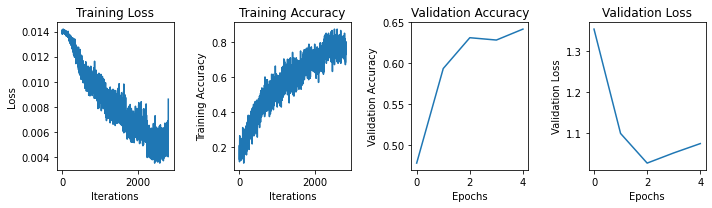

In [5]:
# resnet features extracted here
resnet50 = models.resnet50(pretrained=True).cuda()
num_ftrs = resnet50.fc.in_features
resnet50.fc = nn.Sequential(
    nn.Linear(num_ftrs, 1000),
    nn.ReLU(True),
    nn.Dropout(0.4),
    nn.Linear(1000, 50),
    nn.ReLU(True),
    nn.Dropout(0.4),
    nn.Linear(50, 6)
)
resnet50.fc = resnet50.fc.cuda()
resnet50.cuda()

train.train(model=resnet50, batch_size=batch_size, train_loader=train_loader, val_loader=val_loader, num_epochs=5, lr=0.001)

#### Combined Test Accuracy

In [6]:
train.get_accuracy(resnet50, test_loader)

0.6412352406902816

#### Testing on individual datasets

In [7]:
#load tensors
fer_test_path = '../ProcessedData/Testing/FER_test'
mux_test_path = '../ProcessedData/Testing/Mux_test'
kdef_test_path = '../ProcessedData/Testing/KDEF_test'

fer_test_dataset = torchvision.datasets.DatasetFolder(fer_test_path, loader=torch.load, extensions=('.tensor'))
fer_test_loader = torch.utils.data.DataLoader(fer_test_dataset, batch_size=batch_size, num_workers=num_workers, shuffle=True)

mux_test_dataset = torchvision.datasets.DatasetFolder(mux_test_path, loader=torch.load, extensions=('.tensor'))
mux_test_loader = torch.utils.data.DataLoader(mux_test_dataset, batch_size=batch_size, num_workers=num_workers, shuffle=True)

kdef_test_dataset = torchvision.datasets.DatasetFolder(kdef_test_path, loader=torch.load, extensions=('.tensor'))
kdef_test_loader = torch.utils.data.DataLoader(kdef_test_dataset, batch_size=batch_size, num_workers=num_workers, shuffle=True)



print(train.get_accuracy(resnet50, fer_test_loader))
print(train.get_accuracy(resnet50, mux_test_loader))
print(train.get_accuracy(resnet50, kdef_test_loader))

0.573340874811463
0.7945679012345679
0.7724867724867724
